In [8]:
import pandas as pd
import numpy as np
coord = pd.read_csv('coordinates.txt', sep = ' ', index_col='Index')

In [65]:
# !pip install nilearn

,L/R,Abbreviation,X,Y,Z,Voxels
Index,,,,,,
1,L,Precentral_L,−39,−6,51,3526
2,R,Precentral_R,41,−8,52,3381
3,L,Frontal_Sup_L,−18,35,42,3599
4,R,Frontal_Sup_R,22,31,44,4056
5,L,Frontal_Sup_Orb_L,−17,47,−13,963
...,...,...,...,...,...,...
112,midline,Vermis_6,2,−67,−15,371
113,midline,Vermis_7,2,−72,−25,194
114,midline,Vermis_8,2,−64,−34,243


In [38]:
coord_arr = np.array(coord[['X', 'Y', 'Z']].apply(lambda x: x.replace('−', '-')))

In [69]:
coord_arr = [list(map(lambda x: int(x.replace('−', '-')), y)) for y in coord_arr]


In [7]:
adj_mat = np.random.uniform(size = (116,116))

C:\ProgramData\Anaconda3\envs\Project1\lib\site-packages\nilearn\plotting\displays.py:2204: UserWarning: 'adjacency_matrix' is not symmetric. A directed graph will be plotted.
  warnings.warn(("'adjacency_matrix' is not symmetric. "


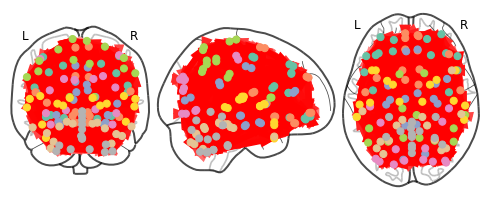

In [70]:
from nilearn import plotting
plotting.plot_connectome(adj_mat, node_coords=coord_arr)

C:\ProgramData\Anaconda3\envs\Project1\lib\site-packages\nilearn\datasets\__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


TypeError: plot_connectome() missing 2 required positional arguments: 'adjacency_matrix' and 'node_coords'